# Bias and Variance

We've already talked about the tradeoff between overfitting and underfitting, and the related tradeoff between flexibility and stability in estimation. Now we'll introduce a third intimately-related pair of concepts: bias and variance. Understanding the difference between bias and variance, and why we can often trade one for the other, is central to developing good intuitions about when and how to select good estimators.

It's probably easiest to understand the concepts of bias and variance through visual illustration. Here's a classic representation:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

from support import get_features, plot_learning_curves

%matplotlib inline

In [2]:
data = pd.read_csv('data/Johnson-2014-IPIP-300.tsv.gz', sep='\t')

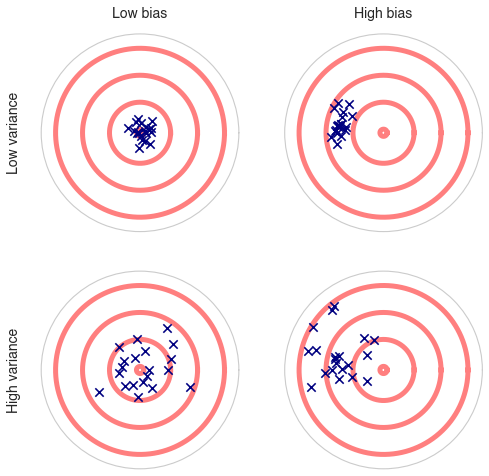

In [3]:
from support import bias_variance_dartboard

bias_variance_dartboard()

Comparing the top and bottom rows gives us a sense of what we mean by *variance*: it's the degree of scatter of our observations around their central tendency. In the context of statistical estimators, we say that an estimator has high variance if the parameter values it produces tend to vary widely over the space of datasets it could be applied to. Conversely, a low-variance estimator tends to produce similar parameter estimates when applied to different datasets.

Bias, by contrast, refers to a statistical estimator's tendency to produce parameter estimates that cluster in a specific part of the parameter space. A high-bias estimator produces parameter estimates that are systematically shifted away from the center of the space towards some other region. A low-bias estimator has no particular preference for one region of space—it tends to produce estimates that distribute relatively evenly through parameter space.

### The bias-variance tradeoff
One interesting property of bias and variance is that they tend to trade off. That is, one can often decrease the variance of an estimator by deliberately increasing its bias, or vice versa. To see this intuitively, imagine the extreme case of an estimator that always generates an identical prediction for all observations. Such an estimator would have low variance (actually, *no* variance) and extremely high bias. Conversely, an estimator that produces extremely variable estimates must be one capable of freely exploring various parts of parameter space—and hence, shows a weaker preference for, or bias towards, certain parts of the space.

This idea has a deep connection to the overfitting/underfitting and flexibility/stability distinctions we drew earlier. In fact, all three distinctions ultimately reflect the same core idea. A *high-variance* (low-bias) estimator is a *flexible* one that can identify a wide variety of patterns in the data; this also makes it more likely to *overfit*. Conversely, a high-bias (low-variance) estimator is a *stable* one that tends to produce similar parameter estimates no matter what data it's presented with; such an estimator will frequently *underfit*, because it lacks the flexibility needed to capture complex patterns in the data.

Scientists often think of bias as a dirty word—i.e., as something to be minimized at all costs. From a machine learning standpoint, however, there's nothing intrinsically bad about bias. The bias of a particular model is nothing more than its systematic tendency to produce parameter estimates that cluster within a particular part of the space (underscoring this point, machine learning researchers usually refer to the intercept of a statistical model as its bias term). Not only is this not a bad thing, it's often absolutely essential for producing good predictions. The key question is this: *to what degree does the inductive bias of a given estimator match the processes that give rise to our data?*

In cases where there's a match between an estimator and the data it's applied to, a biased estimator will tend to perform better than a less biased one. Conversely, if an estimator has the *wrong* bias, it will tend to perform more poorly than an estimator with less bias.

This is a fairly abstract idea, so let's make it concrete. Suppose you park your car at the airport parking lot when you head off for a weekend vacation. Consider two possible strategies you could use to find your car on your return. First, you might rely on your memory of where you left the car; perhaps you think you left it somewhere near that light pole over there in the `B` area of the lot. Second, you could just randomly roam around the parking lot looking for a car the same make and color as yours.

Which of these is the better car-finding strategy? Hopefully you can intuitively see why the answer is "it depends". If you have a good memory, the high-bias strategy—of only looking in a particular part of the lot—will lead you to your car more quickly than a random walk around the entire lot. But if your memory is poor, the biased strategy is likely to be counterproductive, because your car won't be where you remember leaving it, no matter how much time you spend walking around that area. In the latter case, you would have been better off randomly walking around until you found your car.

![](images/parkinglot.jpg)